<a href="https://colab.research.google.com/github/LucasCNFonseca/EngLab/blob/main/dataset_LAB_ENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/elvisacaciobarbosa/detec-o-de-fraude-no-cart-o-de-cr-dito/input


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive
from google.colab import files
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/TCC/creditcard.csv'
data = pd.read_csv(file_path)
display(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


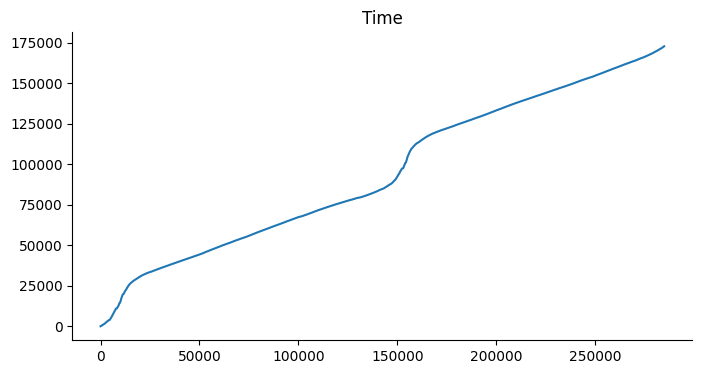

In [ ]:
from matplotlib import pyplot as plt
data['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
number_of_fraude = len(data[data.Class == 1])
number_of_normal= len(data[data.Class == 0])

print ("Fraude:", number_of_fraude)
print ("Normal:",number_of_normal)

Fraude: 492
Normal: 284315


<Axes: xlabel='Class', ylabel='count'>

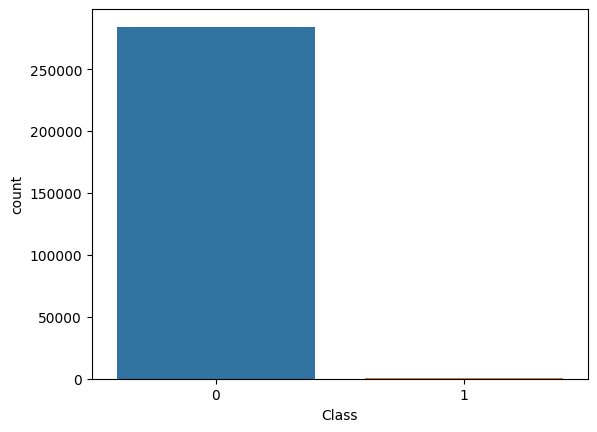

In [ ]:
sns.countplot(x="Class",data=data)

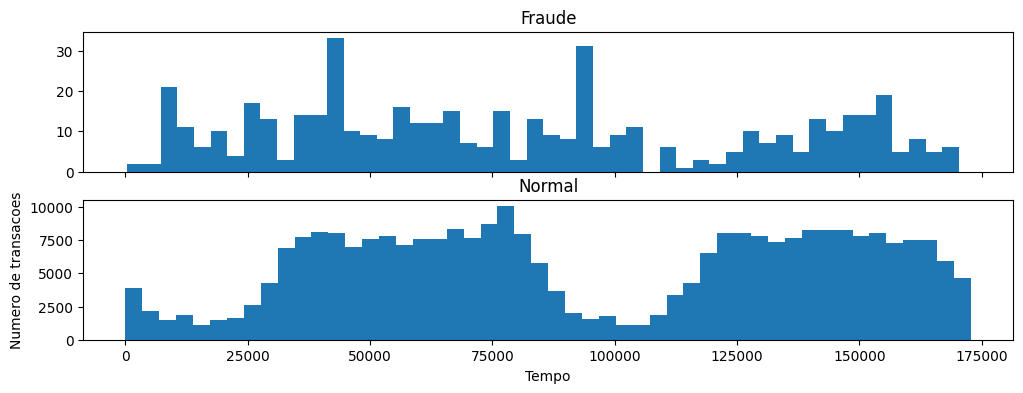

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Tempo')
plt.ylabel('Numero de transacoes')
plt.show()

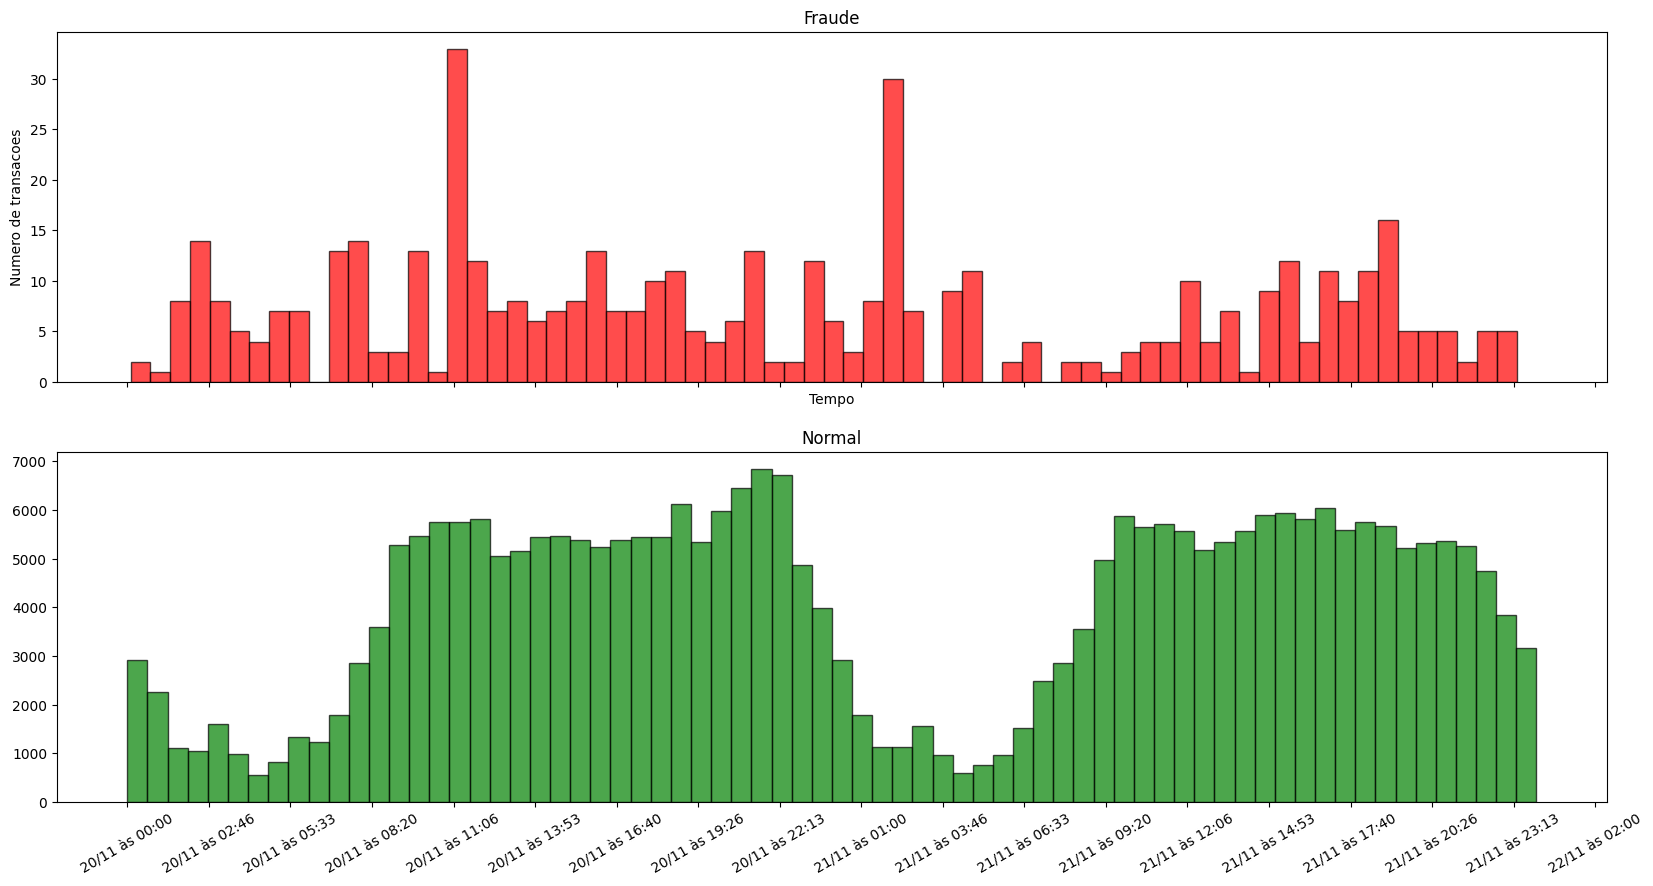

In [ ]:
data['Tempo_em_horas'] = pd.to_datetime("20/11 às 00:00", format="%d/%m às %H:%M") + pd.to_timedelta(data["Time"], unit="s")

# Aumente o espaçamento vertical entre os subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 10), gridspec_kw={'hspace': 0.2})

# Aumente o número de bins para obter uma representação mais suave do histograma
bins = 70

# Adicione alpha para transparência e melhore as cores para maior contraste
ax1.hist(data.Time[data.Class == 1], bins=bins, color='red', alpha=0.7, edgecolor='black')
ax1.set_title('Fraude')

ax1.set_xlabel('Tempo')

ax2.hist(data.Time[data.Class == 0], bins=bins, color='green', alpha=0.7, edgecolor='black')
ax2.set_title('Normal')



ax2.xaxis.set_major_locator(plt.MaxNLocator(20))  # Reduz o número de rótulos no eixo x
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: (pd.to_datetime("20/11 às 00:00", format="%d/%m às %H:%M") + pd.to_timedelta(x, unit='s')).strftime('%d/%m às %H:%M')))

plt.xticks(rotation=30)
# Adicione rótulos aos eixos x e y nos dois subplots
ax1.set_ylabel('Numero de transacoes')
# ax2.set_ylabel('Numero de transacoes')

# plt.xlabel('Tempo')

plt.show()

In [ ]:
print ("Fraude")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

Fraude
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


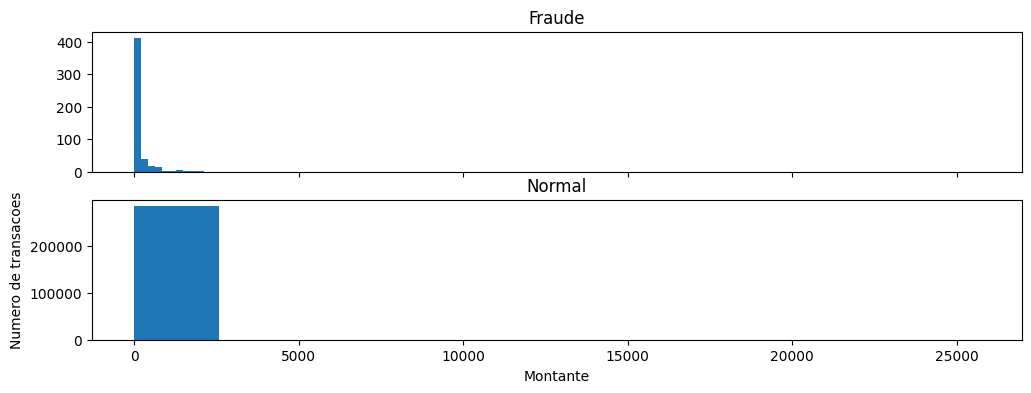

In [ ]:
 f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 10

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Montante')
plt.ylabel('Numero de transacoes')
plt.show()

In [ ]:
PCA_features = data.iloc[:,1:29].columns

<ipython-input-62-2f3bac578713>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cn][data.Class == 1], bins=50)
<ipython-input-62-2f3bac578713>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cn][data.Class == 0], bins=50)
<ipython-input-62-2f3bac578713>:5: UserWarning: 

`distplot` i

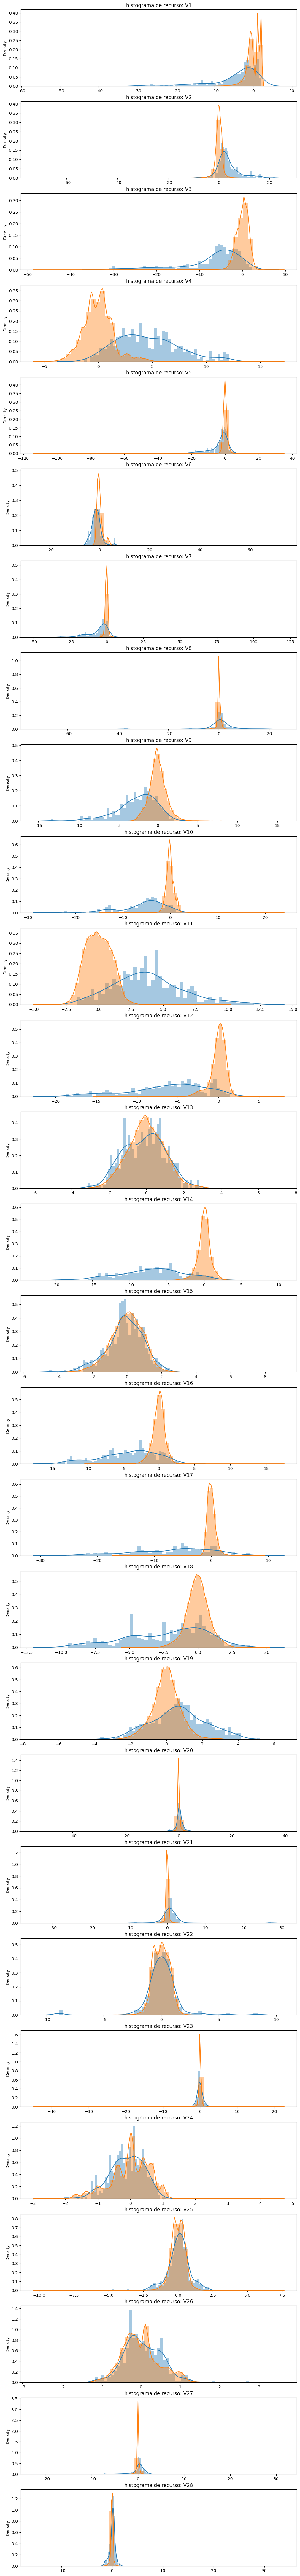

In [ ]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[PCA_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma de recurso: ' + str(cn))
plt.show()

In [ ]:
data = data.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)
display(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,10.00,0


In [ ]:
data['Normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
display(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V12,V14,V16,V17,V18,V19,V21,Amount,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,0.77,0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,24.79,0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,10.00,0,-0.313249


In [ ]:
data = data.drop(['Time','Amount'],axis=1)
display(data)

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,0,-0.313249


In [ ]:
#índices of normal class
indices_of_normal = data[data.Class==0].index
#escolha aleatoriamente a mesma quantidade de amostras que a fraude e retorne seus índices
random_indices_of_normal = np.array(np.random.choice(indices_of_normal, number_of_fraude, replace=False))
#indices of fraud class
indices_of_fraud = np.array(data[data.Class == 1].index)
#indices of undersampled dataset
indices_of_undersampled = np.concatenate([random_indices_of_normal, indices_of_fraud])
#conjunto de dados com pouca amostra
data_of_undersampled = data.iloc[indices_of_undersampled,:]

print(len(data_of_undersampled))

984


In [ ]:
#conjunto de dados inteiro
X = data.loc[:,data.columns!='Class']
y = data.loc[:,data.columns=='Class']

#treinar e testar o conjunto de dados dividido em todo o conjunto de dados, com proporção 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Numero de transacoes treinar conjunto de dados: ", len(X_train))
print("Conjunto de dados de teste de transacoes numericas: ", len(X_test))
print("Numero total de transacoes: ", len(X_train)+len(X_test))

Numero de transacoes treinar conjunto de dados:  199364
Conjunto de dados de teste de transacoes numericas:  85443
Numero total de transacoes:  284807


In [ ]:
#conjunto de dados com pouca amostra
X_undersampled = data_of_undersampled.loc[:,data_of_undersampled.columns!='Class']
y_undersampled = data_of_undersampled.loc[:,data_of_undersampled.columns=='Class']

#conjunto de dados de trem e teste dividido a partir de um conjunto de dados com pouca amostra, com razão 70/30
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.3, random_state = 0)

print("Numero de transacoes treinar conjunto de dados: ", len(X_train_undersampled))
print("Conjunto de dados de teste de transacoes numericas: ", len(X_test_undersampled))
print("Numero total de transacoes: ", len(X_train_undersampled)+len(X_test_undersampled))

Numero de transacoes treinar conjunto de dados:  688
Conjunto de dados de teste de transacoes numericas:  296
Numero total de transacoes:  984


In [ ]:
def train(model,X,y, n_epochs=1000):

    # Recordar para o modelo
    clf = model

    # Diferentes parâmetros C para regularização
    C_param = [0.01,0.1,1,10,100]

    # Validação cruzada do K-Fold
    kf = KFold(n_splits=5)

    # Inicializacao
    scores     =[]
    best_score = 0
    best_C     = 0

    for C in C_param:

        clf.C = C

        score = []
        for train_index, test_index in kf.split(X):

            # Use os dados de treinamento divididos para ajustar-se ao modelo.
            clf.fit(X.iloc[train_index,:].values,y.iloc[train_index,:].values.ravel())

            # Prever valores usando os dados de teste divididos
            y_pred = clf.predict(X.iloc[test_index,:].values)

            # Calcular a pontuação de rechamada e anexá-la a uma lista de pontuações de rechamada representando o parâmetro c_ atual
            rec = recall_score(y.iloc[test_index,:].values.ravel(),y_pred)

            # Anexar pontuação de recordar de cada iteração à pontuação
            score.append(rec)

        # Calcule a pontuação média real para todas as iterações e compare-a com a melhor pontuação.
        mean_score = np.mean(score)
        if mean_score > best_score:
            best_score = mean_score
            best_C     = C

        # Anexar a pontuação média de cada C às pontuações
        scores.append(np.mean(score))

    # # Crie um quadro de dados para mostrar a pontuação média para cada parâmetro C
    # lr_results = pd.DataFrame({'Pontuacao':scores, 'C':C_param})
    # print(lr_results)

    lr_results = pd.DataFrame({'Pontuacao': scores, 'C': C_param})

    # Defina a opção para formatar números de ponto flutuante como inteiros
    pd.set_option('display.float_format', '{:.0f}'.format)

    # Imprima a tabela
    print(lr_results.round(0))


    print("A melhor pontuacao de recordacao eh: ", best_score)
    print("O melhor parametro C eh: ", best_C)

    return best_score, best_C

In [ ]:
def predict(model, X_train, y_train, X_test, y_test, n_epochs=1000):
    # Recordar para o modelo
    clf = model
    #clf = Regressão logística (C = C, penalidade = 'l1')
    # Use todo o conjunto de dados de trem com pouca amostra para ajustar-se ao modelo.
    clf.fit(X_train.values,y_train.values.ravel())
    # Previsão no conjunto de dados de teste com pouca amostra

    y_pred = clf.predict(X_test.values)

    # Matriz de confusão
    CM = confusion_matrix(y_test.values, y_pred)
    # Obter verdadeiros positivos (tp), falsos positivos (fp), falsos negativos (fn)
    tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

    # Prediction report
    sns.heatmap(CM,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Matriz_de_confusao")
    plt.xlabel("Classe_prevista")
    plt.ylabel("Classe Real")
    plt.show()
    print("\n----------Relatorio de classificacao------------------------------------")
    print(classification_report(y_test.values, y_pred))

# **Testes da regresão logística**

In [ ]:
# Defina um espaço de hiperparâmetros para pesquisa
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Crie um objeto GridSearchCV para pesquisa de hiperparâmetros
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='recall')

# Realize a pesquisa de hiperparâmetros
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Obtenha os melhores hiperparâmetros encontrados
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']
best_solver = grid_search.best_params_['solver']

# Treine o modelo com os melhores hiperparâmetros
clf = LogisticRegression(C=best_C, penalty=best_penalty, solver=best_solver)
clf.fit(X_train_undersampled, y_train_undersampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [ ]:
def evaluate_logistic_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    score = model.score(X_test, y_test)
    return accuracy, recall, precision, score

accuracy, recall, precision, score = evaluate_logistic_regression(clf, X_test_undersampled, y_test_undersampled)

print("Acurácia: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precisão: {:.2f}".format(precision))
print("Score: {:.2f}".format(score))

Acurácia: 0.90
Recall: 0.93
Precisão: 0.88
Score: 0.90


In [ ]:
clf = LogisticRegression(penalty = 'l2', solver ='lbfgs')
best_score, best_C = train(clf, X_train_undersampled,y_train_undersampled, n_epochs=1000)

   Pontuacao   C
0          1   0
1          1   0
2          1   1
3          1  10
4          1 100
A melhor pontuacao de recordacao eh:  0.9123281243231324
O melhor parametro C eh:  100


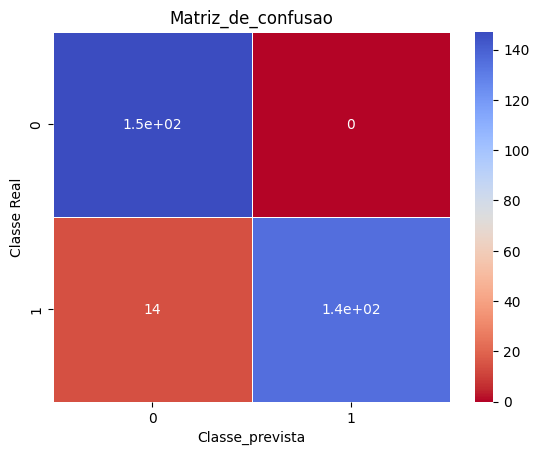


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       147
           1       1.00      0.91      0.95       149

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296



In [ ]:
clf = LogisticRegression(C=best_C, penalty = 'l2', solver ='lbfgs')
predict(clf, X_train_undersampled,y_train_undersampled,X_test_undersampled,y_test_undersampled, n_epochs=1000)

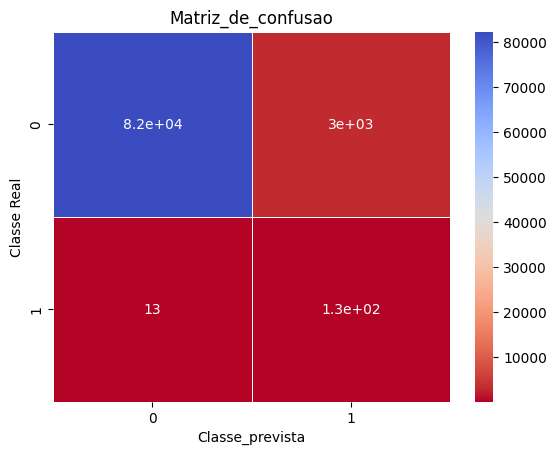


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.91      0.08       147

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [ ]:
predict(clf,X_train_undersampled,y_train_undersampled,X_test,y_test)

In [ ]:
clf = LogisticRegression(penalty = 'l2',solver ='lbfgs')
best_score_whole, best_C_whole = train(clf,X_train,y_train)

   Pontuacao   C
0          1   0
1          1   0
2          1   1
3          1  10
4          1 100
A melhor pontuacao de recordacao eh:  0.6080222307849583
O melhor parametro C eh:  1


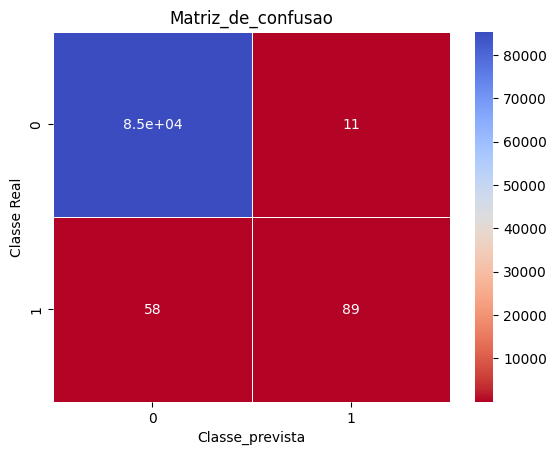


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.61      0.72       147

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
clf = LogisticRegression(C=best_C_whole,penalty = 'l2',solver='lbfgs')
predict(clf,X_train,y_train,X_test,y_test)

# **Testes do Support Vector Classifier (SVM)**

In [ ]:
# Defina um espaço de hiperparâmetros para pesquisa
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly']
}

# Crie um objeto GridSearchCV para pesquisa de hiperparâmetros
grid_search = GridSearchCV(SVC(), param_grid, cv=100, scoring='recall')

# Realize a pesquisa de hiperparâmetros
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Obtenha os melhores hiperparâmetros encontrados
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

# Treine o modelo com os melhores hiperparâmetros
clf = SVC(C=best_C, kernel=best_kernel, gamma='auto')
clf.fit(X_train_undersampled, y_train_undersampled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC(C=1000, gamma='auto')

In [ ]:
clf = SVC(gamma='auto', C=10000)
best_score, best_C = train(clf, X_train_undersampled,y_train_undersampled)

   Pontuacao   C
0          1   0
1          1   0
2          1   1
3          1  10
4          1 100
A melhor pontuacao de recordacao eh:  0.94113683942887
O melhor parametro C eh:  10


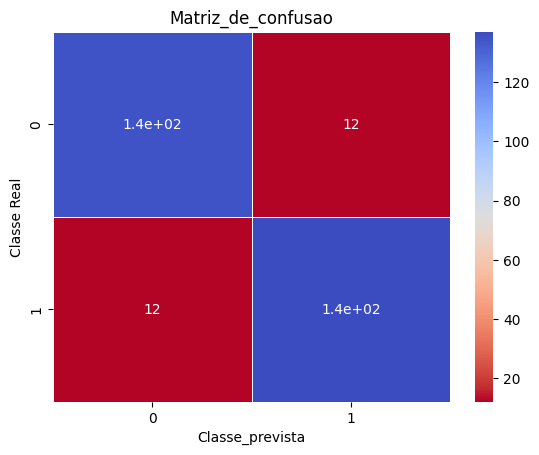


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       147
           1       0.92      0.92      0.92       149

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [ ]:
clf = SVC(C=best_C,gamma='auto')
predict(clf, X_train_undersampled,y_train_undersampled,X_test_undersampled,y_test_undersampled)

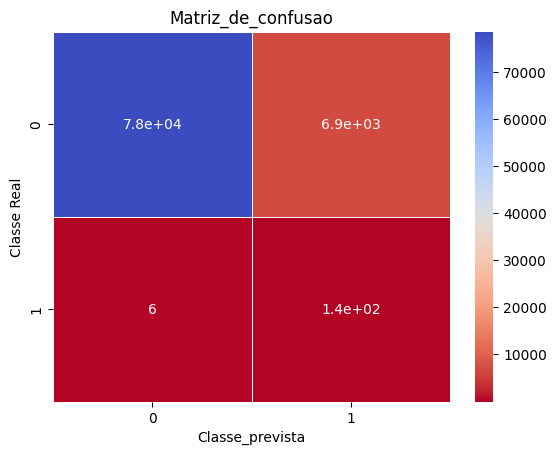


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85296
           1       0.02      0.96      0.04       147

    accuracy                           0.92     85443
   macro avg       0.51      0.94      0.50     85443
weighted avg       1.00      0.92      0.96     85443



In [ ]:
predict(clf,X_train_undersampled,y_train_undersampled,X_test,y_test)

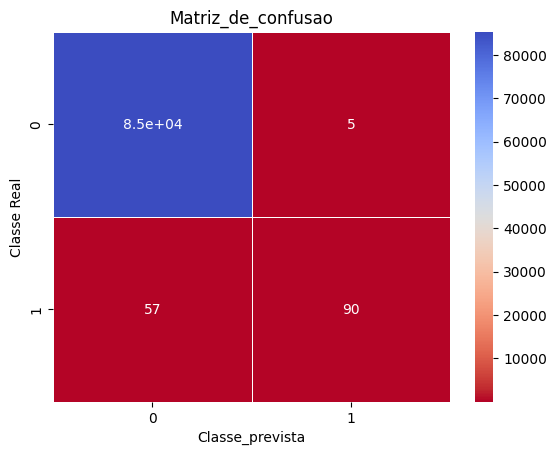


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.61      0.74       147

    accuracy                           1.00     85443
   macro avg       0.97      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
predict(clf,X_train,y_train,X_test,y_test)

# **Testes da Árvore de decisão**

In [ ]:
# Defina um espaço de hiperparâmetros para pesquisa
param_grid = {
    'max_depth': [None, None, None, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crie um objeto GridSearchCV para pesquisa de hiperparâmetros
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=200, scoring='recall')

# Realize a pesquisa de hiperparâmetros
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Obtenha os melhores hiperparâmetros encontrados
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Treine o modelo com os melhores hiperparâmetros
clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
clf.fit(X_train_undersampled, y_train_undersampled)

DecisionTreeClassifier(min_samples_leaf=4)

In [ ]:
def evaluate_decision_tree(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    score = model.score(X_test, y_test)
    return accuracy, recall, precision, score

accuracy, recall, precision, score = evaluate_decision_tree(clf, X_test_undersampled, y_test_undersampled)

print("Acurácia: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precisão: {:.2f}".format(precision))
print("Score: {:.2f}".format(score))

Acurácia: 0.90
Recall: 0.87
Precisão: 0.92
Score: 0.90


In [ ]:
clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train_undersampled, y_train_undersampled.values.ravel())

DecisionTreeClassifier()

In [ ]:
def evaluate(model, X_train, y_train, X_test, y_test):
    # Treinar o modelo
    clf = model
    clf.fit(X_train.values, y_train.values.ravel())

    # Prever no conjunto de teste
    y_pred = clf.predict(X_test.values)

    # Calcular e imprimir a acurácia, recall, precisão e pontuação (score)
    accuracy = accuracy_score(y_test.values, y_pred)
    recall = recall_score(y_test.values, y_pred)
    precision = precision_score(y_test.values, y_pred)
    score = clf.score(X_test.values, y_test.values)

    print("Acurácia: {:.2f}%".format(accuracy * 100))
    print("Recall: {:.2f}".format(recall))
    print("Precisão: {:.2f}%".format(precision * 100))
    print("Score: {:.2f}".format(score))


In [ ]:
evaluate(clf, X_train_undersampled, y_train_undersampled, X_test_undersampled, y_test_undersampled)

Acurácia: 89.53%
Recall: 0.89
Precisão: 90.41%
Score: 0.90


In [ ]:
evaluate(clf, X_train, y_train, X_test, y_test)

Acurácia: 99.91%
Recall: 0.73
Precisão: 75.52%
Score: 1.00


# **Cálculo da acurácia, recall, precisão e score**

In [ ]:
def evaluate(model, X_train, y_train, X_test, y_test):
    # Treinar o modelo
    clf = model
    clf.fit(X_train.values, y_train.values.ravel())

    # Prever no conjunto de teste
    y_pred = clf.predict(X_test.values)

    # Calcular e imprimir a acurácia, recall, precisão e pontuação (score)
    accuracy = accuracy_score(y_test.values, y_pred)
    recall = recall_score(y_test.values, y_pred)
    precision = precision_score(y_test.values, y_pred)
    score = clf.score(X_test.values, y_test.values)

    print("Acurácia: {:.2f}%".format(accuracy * 100))
    print("Recall: {:.2f}".format(round(recall, 0)))  # Arredonda para o inteiro mais próximo
    print("Precisão: {:.2f}%".format(precision * 100))
    print("Score: {:.2f}".format(round(score, 0)))  # Arredonda para o inteiro mais próximo

# Avaliar no conjunto de dados de teste com pouca amostra
evaluate(clf, X_train_undersampled, y_train_undersampled, X_test_undersampled, y_test_undersampled)

# Avaliar no conjunto de dados de teste original
evaluate(clf, X_train, y_train, X_test, y_test)

Acurácia: 91.89%
Recall: 1.00
Precisão: 94.33%
Score: 1.00
Acurácia: 99.92%
Recall: 1.00
Precisão: 77.70%
Score: 1.00
